<a href="https://colab.research.google.com/github/VanNguyenThiCam/LinearRegression/blob/main/LINEAR_researcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÔ HÌNH TUYẾN TÍNH (LINEAR MODEL)

Bắt đầu từ những hàm cơ bản từ numpy, tensorflow

In [2]:
import tensorflow as tf
import numpy as np

#chuẩn bị data

from google.colab import drive #cách lấy dữ liệu trên google.colab 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = np.genfromtxt('/content/gdrive/MyDrive/Colab Notebooks/Data/data.csv',delimiter =',')

n = 4
X = data[:,0:1]
y = data[:,1:]

**Ôn lại hàm class trong python**

class SGD:
     def __int__(self,lr): Khởi tạo tham số đầu vào là lr
        self.lr = lr #self.lr bản thân của biến đó sẽ tự lưu 

     def __call__(self,value):
        self.lr = self.lr + value

sgd_instance = SGD(0.1)
sgd_instance(0.3)
print(sgd_instance.lr)

In [4]:
#khởi tạo mô hình tuyến tính

class Model(object):
     def __init__(self): #khởi taọ giá trị tham số ban đầu 
         self.W = tf.Variable(-0.34)
         self.b = tf.Variable(0.04)
     def __call__(self,x):
         return self.W*x + self.b

model = Model()

In [5]:
print(X) #kiểm tra thử đã xuất ra đúng data chưa

[[6.7]
 [4.6]
 [3.5]
 [5.5]]


In [18]:
print(y)

[[9.1]
 [5.9]
 [4.6]
 [6.7]]


In [6]:
print(X.shape)

(4, 1)


In [7]:
y_hat = model(X)
print(y_hat)

tf.Tensor(
[[-2.238    ]
 [-1.524    ]
 [-1.1500001]
 [-1.83     ]], shape=(4, 1), dtype=float32)


In [8]:
loss = (y-y_hat)**2
print(loss.numpy()) # nếu không .numpy() thì nó xuất ra kiểu tensor 

[[128.55026 ]
 [ 55.11578 ]
 [ 33.0625  ]
 [ 72.760895]]


In [14]:
#training mô hình

learning_rate = 0.01
epochs  = 100

losses =[]

for epoch in range(epochs):
    with tf.GradientTape() as t:
        #y mũ
        y_hat = model(X)

        #hàm mất mát
        loss_v = tf.reduce_mean(tf.square(y_hat - y))
        #có thể viết cách khác không dùng hàm
        #loss_v = tf.reduce_mean(y_hat-y)**2

        losses.append(loss_v.numpy())

        #tính đạo hàm
        dW,db = t.gradient(loss_v,[model.W,model.b])
        
        #cách viết riêng 
        #dW = t.gradient(loss_v, model.W)
        #db = t.gradient(loss_v, model.b)


        #cập nhật tham số

        model.W.assign_sub(learning_rate*dW)  

        #Có thể viết cách khác model.W = model.W - learning_rate*dW 
        model.b.assign_sub(learning_rate*db)



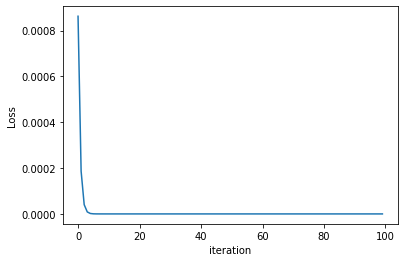

In [15]:
import matplotlib.pyplot as plt

#vẽ hàm mất mát

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [17]:
model.W

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.2552931>

In [11]:
y_hat = model(X)
print(y_hat)

tf.Tensor(
[[8.637505 ]
 [6.0139856]
 [4.639762 ]
 [7.138351 ]], shape=(4, 1), dtype=float32)
